# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name:
## Student ID:

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [31]:
housing_df = pd.DataFrame(housing_df)

### 1.1.1 Checking for missing values

In [32]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### 1.1.2 Visualizing the features

#### A) Visualizing the Longtitude feature
- For bin count, we can use Sturge's formula.
- It is a quantiative data, histogram would be convenient.
- stat='density' is used, so that the sum of the bars will add up to 1, thus truly visualizing the distribution. (It would not affect the overall shape but I thought it is more convenient.)

<AxesSubplot: xlabel='longitude', ylabel='Density'>

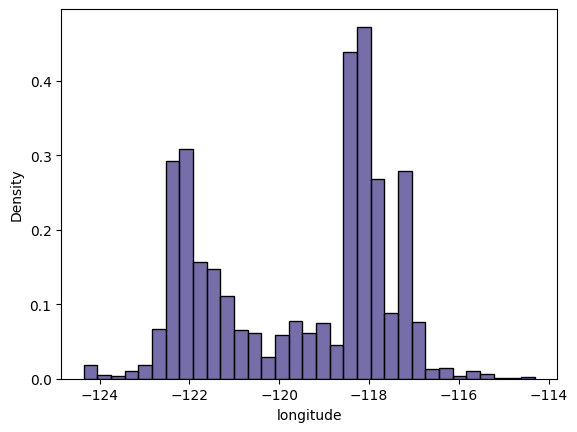

In [33]:
bin_count = int(1 + 3.3*math.log(housing_df['longitude'].count()))

sns.histplot(housing_df['longitude'], bins=bin_count, color='darkslateblue', stat='density')

#### B) Visualizing the Latitude feature

<AxesSubplot: xlabel='latitude', ylabel='Density'>

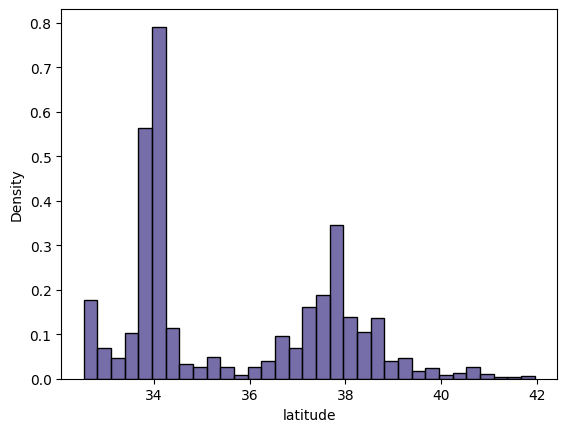

In [34]:
bin_count = int(1 + 3.3*math.log(housing_df['latitude'].count()))

sns.histplot(housing_df['latitude'], bins=bin_count, color='darkslateblue', stat='density')

#### C) Visualizing the Housing Median Range feature

<AxesSubplot: xlabel='housing_median_age', ylabel='Density'>

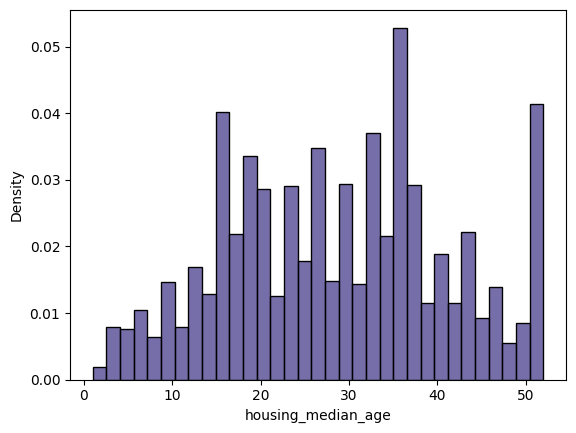

In [35]:
bin_count = int(1 + 3.3*math.log(housing_df['housing_median_age'].count()))

sns.histplot(housing_df['housing_median_age'], bins=bin_count, color='darkslateblue', stat='density')

#### D) Visualizing the Total Rooms feature

<AxesSubplot: xlabel='total_rooms', ylabel='Density'>

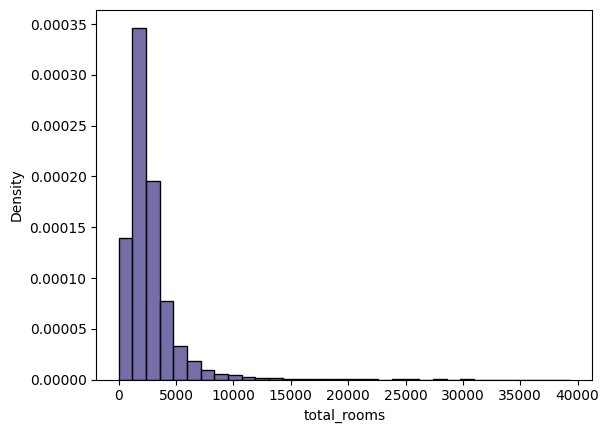

In [36]:
bin_count = int(1 + 3.3*math.log(housing_df['total_rooms'].count()))

sns.histplot(housing_df['total_rooms'], bins=bin_count, color='darkslateblue', stat='density')

#### E) Visualizing the Total Bedrooms feature

<AxesSubplot: xlabel='total_bedrooms', ylabel='Count'>

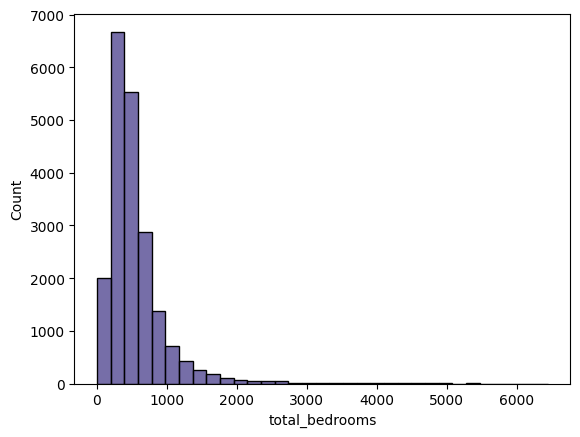

In [37]:
bin_count = int(1 + 3.3*math.log(housing_df['total_bedrooms'].count()))

sns.histplot(housing_df['total_bedrooms'], bins=bin_count, color='darkslateblue')

#### F) Visualizing the Population feature

<AxesSubplot: xlabel='population', ylabel='Density'>

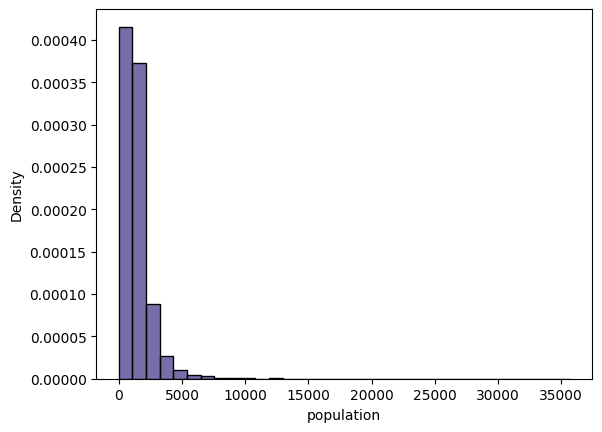

In [38]:
bin_count = int(1 + 3.3*math.log(housing_df['population'].count()))

sns.histplot(housing_df['population'], bins=bin_count, color='darkslateblue', stat='density')

#### G) Visualizing the Households feature

<AxesSubplot: xlabel='households', ylabel='Density'>

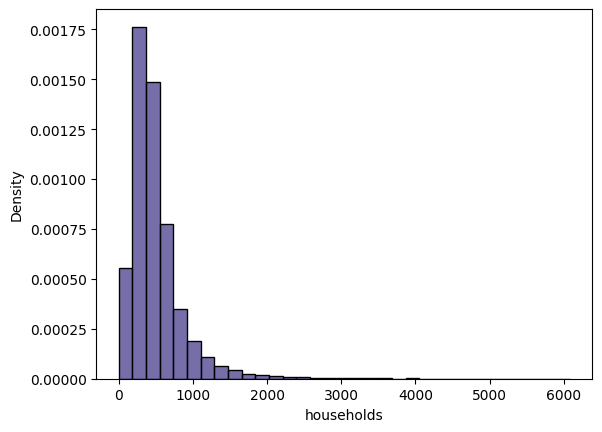

In [39]:
bin_count = int(1 + 3.3*math.log(housing_df['households'].count()))

sns.histplot(housing_df['households'], bins=bin_count, color='darkslateblue', stat='density')

#### H) Visualizing the Median Income feature

<AxesSubplot: xlabel='median_income', ylabel='Density'>

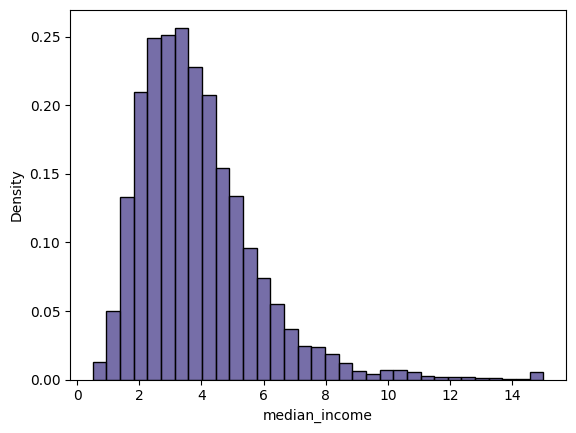

In [43]:
bin_count = int(1 + 3.3*math.log(housing_df['median_income'].count()))

sns.histplot(housing_df['median_income'], bins=bin_count, color='darkslateblue', stat='density')

#### I) Visualizing the Median House Value feature

<AxesSubplot: xlabel='median_house_value', ylabel='Density'>

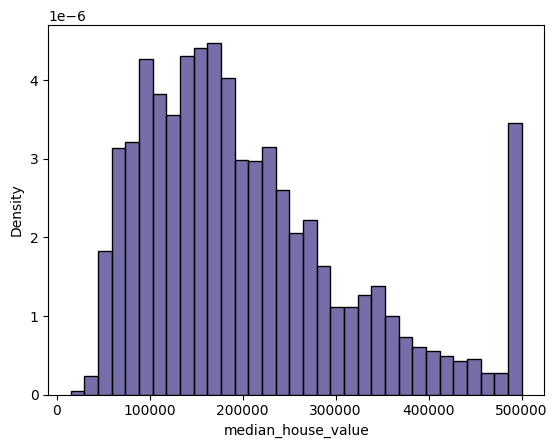

In [46]:
bin_count = int(1 + 3.3*math.log(housing_df['median_house_value'].count()))

sns.histplot(housing_df['median_house_value'], bins=bin_count, color='darkslateblue', stat='density')

#### J) Visualizing the Ocean Proximity feature
- This is a qualitative data. Since it is qualitative, bar plots was found to be convenient.

([<matplotlib.patches.Wedge at 0x242c471ae10>,
 [Text(0.19716564197898398, 1.0821856169913806, 'NEAR BAY'),
  Text(-0.8844748613710405, -0.6539909935180139, '<1H OCEAN'),
  Text(0.4958059239440402, -0.9819248880550879, 'INLAND'),
  Text(1.033279604741086, -0.3772708025094247, 'NEAR OCEAN'),
  Text(1.0999996814845978, -0.0008370984311453185, 'ISLAND')],
 [Text(0.10754489562490034, 0.5902830638134803, '44.26%'),
  Text(-0.4824408334751129, -0.3567223601007348, '31.74%'),
  Text(0.27043959487856734, -0.5355953934845934, '12.88%'),
  Text(0.5636070571315014, -0.2057840740960498, '11.09%'),
  Text(0.599999826264326, -0.0004565991442610828, '0.02%')])

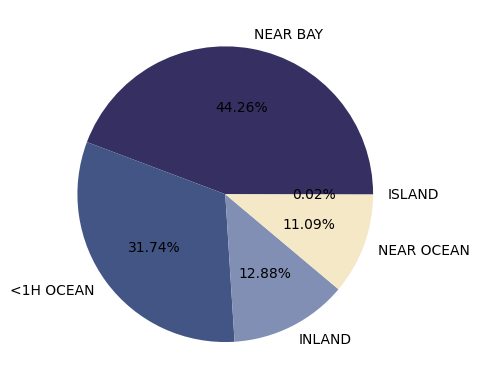

In [56]:
plt.pie(housing_df['ocean_proximity'].value_counts(), labels=housing_df['ocean_proximity'].unique(), colors=['#363062', '#435585', '#818FB4', '#F5E8C7'], autopct='%1.2f%%')

As seen, value 'ISLAND' is occured so less that it even does not take any space on the pie graph. So, let's put them in a bar plot to see if anything changes.

C:\Users\Bora\AppData\Local\Temp\ipykernel_43652\1696510019.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=housing_df['ocean_proximity'].value_counts(), x=housing_df['ocean_proximity'].unique(), palette=['#f72585', '#7209b7', '#3a0ca3', '#4361ee', '#4cc9f0'])


<AxesSubplot: ylabel='count'>

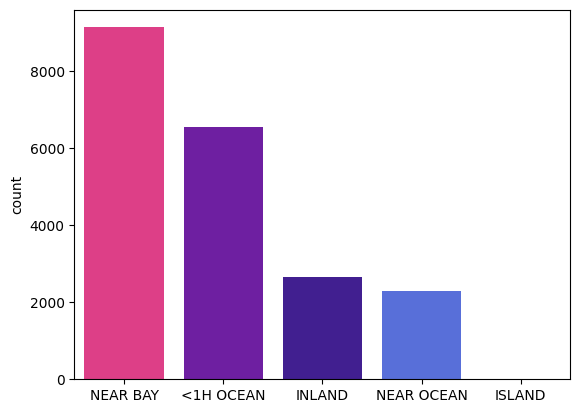

In [73]:
sns.barplot(y=housing_df['ocean_proximity'].value_counts(), x=housing_df['ocean_proximity'].unique(), palette=['#f72585', '#7209b7', '#3a0ca3', '#4361ee', '#4cc9f0'])

It did not make any difference. That is because 'ISLAND' has so little occurence in the dataset. 

In [89]:
print(f"Ocean proximity is occured in this dataset for {len(housing_df[housing_df['ocean_proximity'] == 'ISLAND'])} times.")

Ocean proximity is occured in this dataset for 5 times.


*Ocean proximity is occured in this dataset for 5 times.*

That tells us something. The closest value to 5 is more than 2000. So, it is natural not being able to see it separately. 

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

In [41]:
import sklearn

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

\< double click and insert answer here \>

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices